In [3]:
# Import packages
import cv2
import numpy as np
from matplotlib import pyplot as plt
from skimage import io, color, filters, util
from skimage.morphology import disk, ball

from skimage.color import rgb2gray
from skimage.filters import sobel
from skimage.segmentation import mark_boundaries, slic
from skimage.util import img_as_float

### 1. Terdapat suatu gambar bubble.jpg yang terdiri dari beberapa bubble

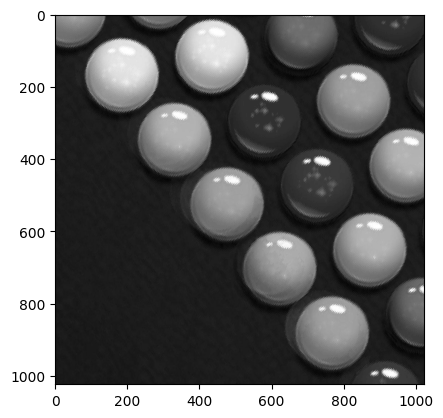

In [4]:
bubble = io.imread('bubble.jpg')
plt.imshow(bubble, cmap="gray")

1.a Lakukan Basic Edge Detection dengan thresholding pada citra tersebut

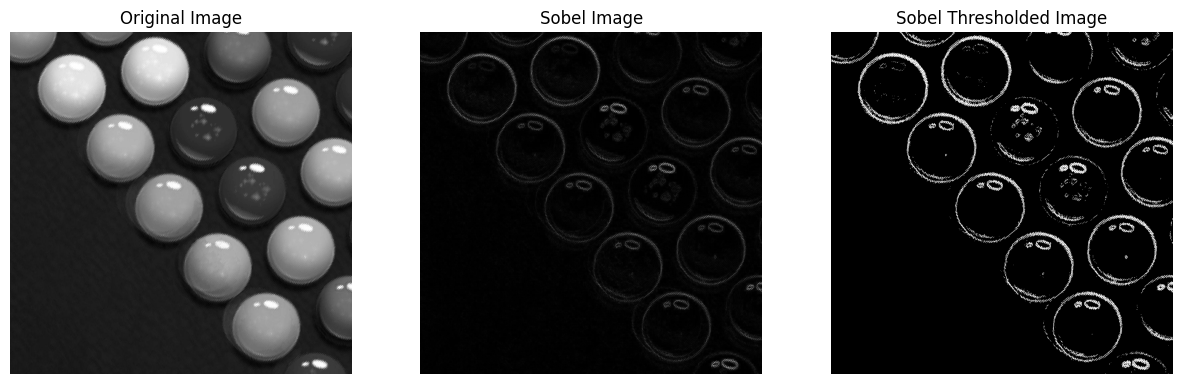

In [5]:
sobel = util.img_as_ubyte(filters.sobel(bubble))

# Anda dapat bereksperimen dengan nilai lower and upper bound lain dari threshold
_, sobel_threshold = cv2.threshold(sobel, 15, 255, cv2.THRESH_BINARY)

plt.figure(figsize=(15,7.5))
plt.subplot(131),plt.imshow(bubble, cmap="gray")
plt.axis("off")
plt.title('Original Image')
plt.subplot(132),plt.imshow(sobel, cmap='gray')
plt.axis("off")
plt.title('Sobel Image')
plt.subplot(133),plt.imshow(sobel_threshold, cmap='gray')
plt.axis("off")
plt.title('Sobel Thresholded Image')
plt.show()

(-0.5, 1023.5, 1023.5, -0.5)

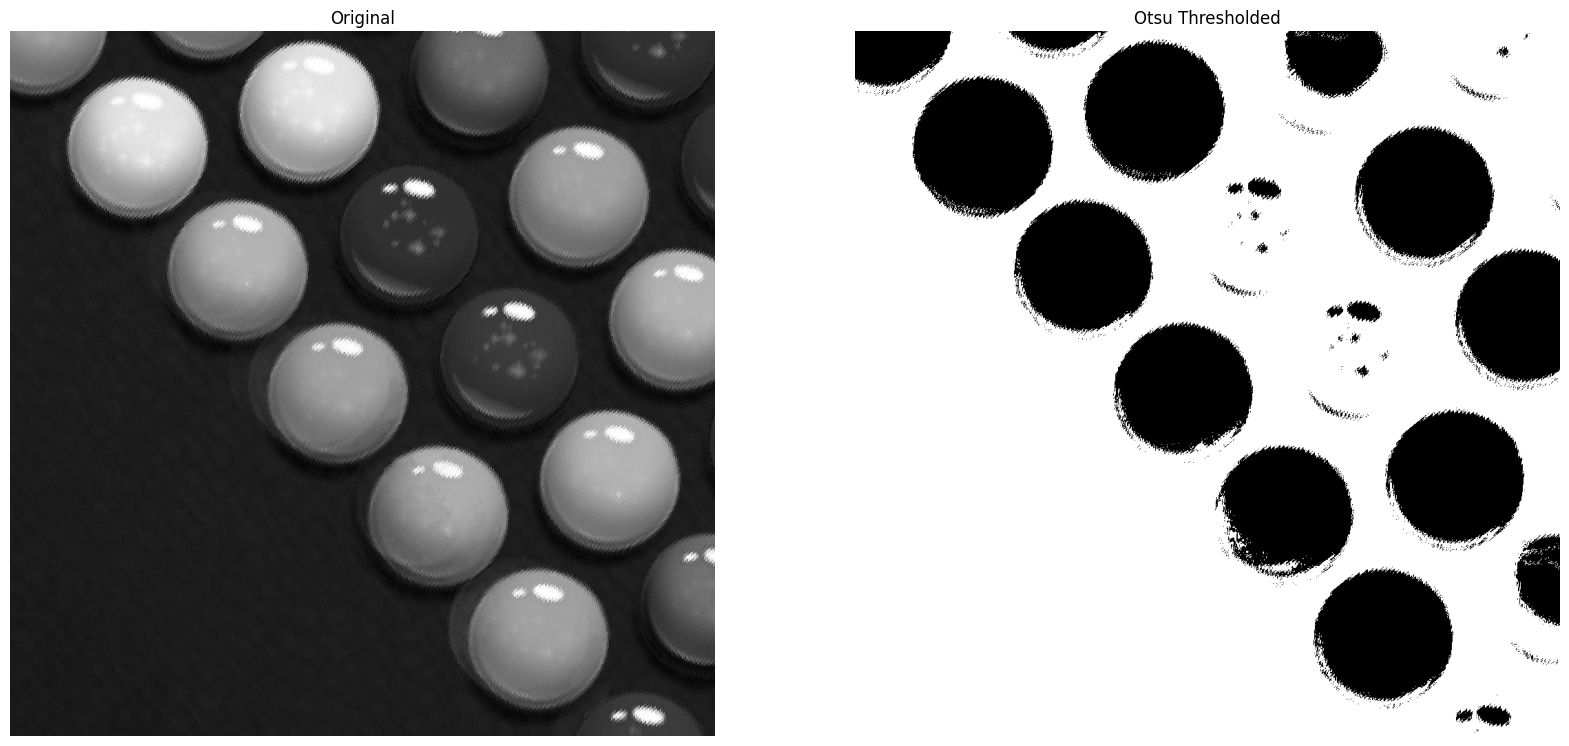

In [6]:
G = util.img_as_ubyte(bubble)
T = filters.threshold_otsu(G)
S = util.img_as_float(G > T)

plt.figure(figsize=(20,10))
plt.subplot(1,2,1); plt.imshow(bubble, cmap="gray")
plt.title('Original'); plt.axis("off")
plt.subplot(1,2,2); plt.imshow(1-S, cmap='gray')
plt.title("Otsu Thresholded"); plt.axis("off")

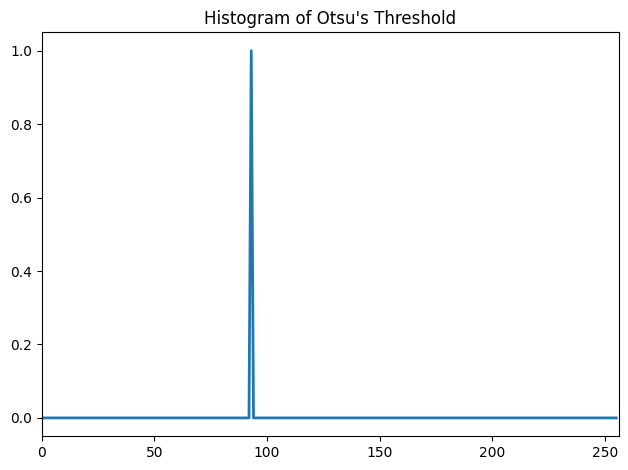

In [7]:
hist, bins = np.histogram(T.flatten(), bins=256, range=[0,256])

# Plot the histogram
plt.plot(bins[:-1], hist, lw=2)
plt.title("Histogram of Otsu's Threshold")
plt.xlim([0, 256])  # Assuming the image is 8-bit, if not, adjust this accordingly

plt.tight_layout()  # Adjust subplots to fit into figure area.
plt.show()

**1.c Jelaskan perbedaan hasil dari basic edge detection + thresholding pada (a) dan Otsu’s Thresholding pada (b) dan alasan mengapa perbedaan tersebut bisa terjadi.**

Hasil citra dari basic edge detection + thresholding memiliki warna putih pada edge atau pinggiran objek pada citra bubble, sedangkan hasil citra dari Otsu's Thresholding memberikan warna putih pada intensitas piksel rendah yang pada citra bubble. Hal tersebut dikarenakan hasil citra dari basic edge detection cenderung menitikberatkan pada deteksi edge pada gambar bubble, sedangkan hasil citra Otsu's thresholding menitikberatkan pada perbedaan intensitas piksel pada citra yang termasuk. Kedua hal tersebut memberikan gambaran pendekatan yang berbeda untuk mendapatkan segmentasi citra pada sebuah gambar dimana citra yang dilakukan basic edge detection + thresholding memanfaatkan sifat diskontinuitas dari intensitas piksel sedangkan Otsu's thresholding memanfaatkan similaritas antarpiksel pada citra.

**1.d Tentukan metode mana yang lebih optimal untuk citra ini dan mengapa?**

Menurut saya metode yang lebih optimal untuk citra di atas adalah edge detection + thresholding. Hal tersebut dikarenakan jika kita menggunakan Otsu's thresholding, yang mana memanfaatkan similaritas antarpiksel, terdapat beberapa objek bubble pada citra di atas yang memiliki intensitas piksel yang serupa dengan backgroundnya. Sebagai contoh pada citra di atas terdapat beberapa objek bubble yang memiliki warna cenderung gelap menuju hitam yang sama dengan mirip dengan warna background citra. Hal tersebut mengakibatkan segmentasi citra yang dilakukan kemudian dengan otsu's thresholding memberikan hasil yang tidak terlalu baik. Pada gambar hasil otsu's thresholidng di atas dapat dilihat bahwa hasilnya kemudian tidak terlalu membentuk objek bubble seperti yang seharusnya atau yang diinginkan. 

Sedangkan untuk hasil visualisasi yang didapatkan dengan metode edge detection + thresholding segmentasi gambar yang dihasilkan terlihat lebih jelas sehingga setiap objek bubble dapat dideteksi dengan baik dan segmentasi gambar dapat dikatakan berhasil. Hal tersebut dikarenakan masih terdapat beberapa piksel yang memiliki intensitas yang lebih tinggi pada pinggir objek bubble tersebut sehingga objek bubble tersebut kemudian dapat dideteksi oleh edge detection dan dengan memanfaatkan thresholding berhasil menangkap edge dan memberikan bentuk pada objek bubble dengan baik.

### 2. Diberikan sebuah citra “flower.jpg”

(-0.5, 539.5, 359.5, -0.5)

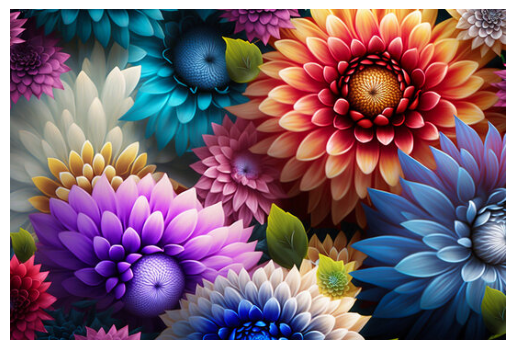

In [8]:
flower = io.imread('flower.jpeg')
plt.imshow(flower)
plt.axis("off")

**2.a  Gunakan algoritma SLIC untuk melakukan segmentasi dengan variasi jumlah segmen 10, 50, dan 100.**

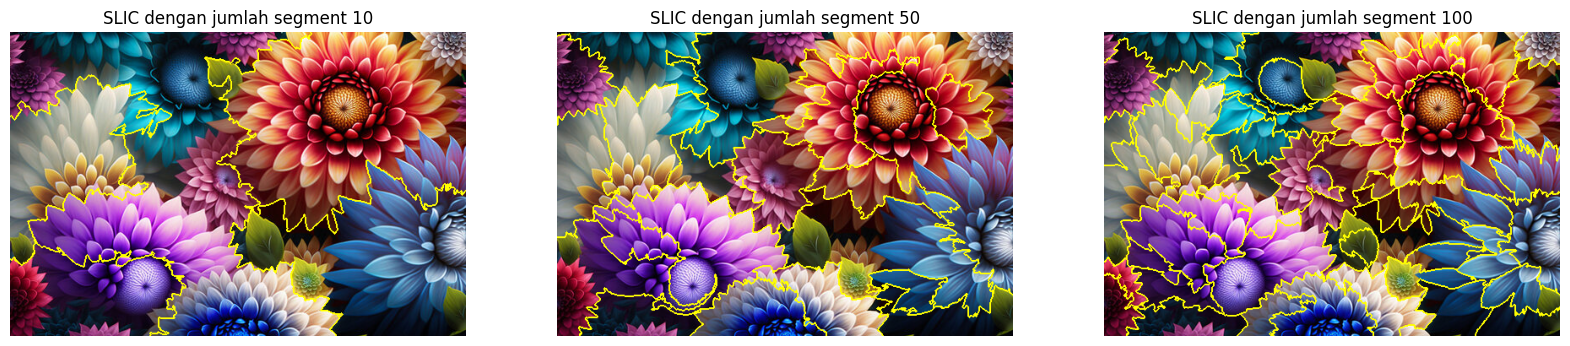

In [9]:
segments_num = [10, 50, 100]

plt.figure(figsize=(20,7))
counter = 1
for num in segments_num:
    plt.subplot(1,3,counter)
    plt.imshow(mark_boundaries(flower, slic(flower, n_segments=num)))
    plt.title(f"SLIC dengan jumlah segment {num}")
    plt.axis("off")
    counter += 1
plt.show()

**2.b Visualisasikan hasil (a) dalam bentuk penyeragaman piksel untuk setiap superpiksel yang telah disegmentasi. Gunakan nilai median untuk memilih piksel yang dipilih untuk setiap superpiksel.**

In [12]:
def superpixel_median_image(image, slic_labels):
    """
        Code taken from https://stackoverflow.com/a/57746835
        Turn image into superpixel image, given SLIC segment labels.
    """
    im_rp = image.reshape((image.shape[0]*image.shape[1],image.shape[2]))
    sli_1d=np.reshape(slic_labels,-1)
    uni=np.unique(sli_1d)
    new_img=np.zeros(im_rp.shape)
    for i in uni:
        loc=np.where(sli_1d==i)[0]
        #print(loc)
        mm=np.median(im_rp[loc,:],axis=0)
        new_img[loc,:]=mm
    return np.reshape(new_img,[image.shape[0],image.shape[1],image.shape[2]]).astype('uint8')

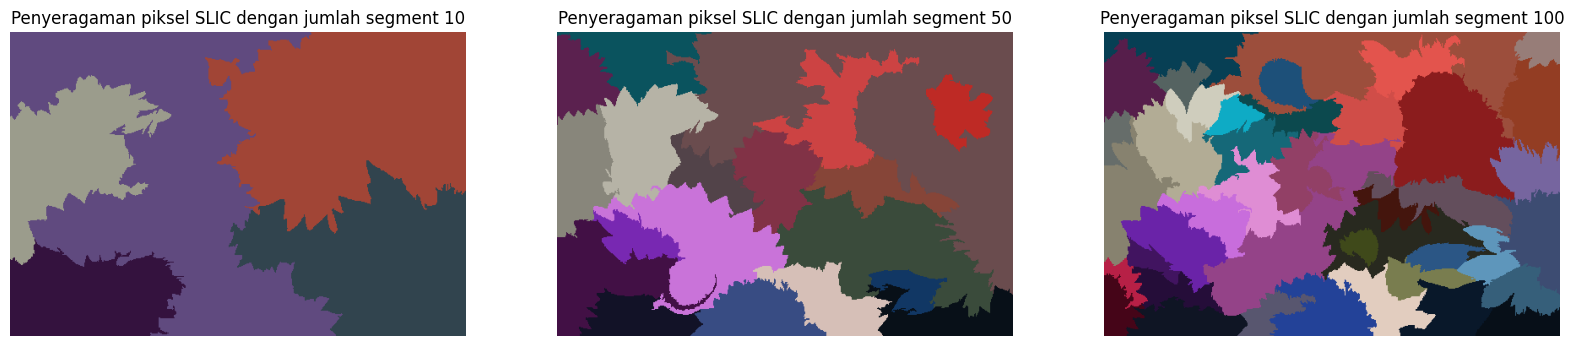

In [13]:
segments_num = [10, 50, 100]

plt.figure(figsize=(20,7))
counter = 1
for num in segments_num:
    plt.subplot(1,3,counter)
    plt.imshow(superpixel_median_image(flower, slic(flower, n_segments=num)))
    plt.title(f"Penyeragaman piksel SLIC dengan jumlah segment {num}")
    plt.axis("off")
    counter += 1
plt.show()

**2.c Berdasarkan hasil visualisasi (b), apa pengaruh jumlah segmen terhadap hasil segmentasi? Menurut anda, berapa jumlah segmen yang memberikan hasil terbaik?**

Pengaruh dari jumlah segmen adalah dapat memberikan jangkauan yang lebih luas untuk menangkap berbagai jenis intensitas yang ada pada citra atau kualitas segmentasi yang dihasilkan lebih baik. 

Semakin banyak jumlah segmen yang diberikan maka semakin banyak juga jenis warna yang dapat ditangkap. Sebagai contoh dengan jumlah segmen yang lebih banyak dapat menangkap ungu tua dan ungu muda, merah tua dan merah mudah, dll. Dari hasil visualisasi di atas maka jumlah segmen yang memberikan hasil terbaik adalah jumlah segmen 100 dimana berhasil menangkap lebih banyak variasi intensitas piksel yang ada pada citra sesuai dengan citra awal yang mana memiliki begitu banyak kombinasi warna atau variasi intensitas piksel.